In [56]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') # this file is in files_for_lesson_and_activities folder
data#.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.shape

(9134, 24)

In [4]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
Customer,0.0
State,0.0
Vehicle Class,0.0
Total Claim Amount,0.0
Sales Channel,0.0
Renew Offer Type,0.0
Policy,0.0
Policy Type,0.0
Number of Policies,0.0
Number of Open Complaints,0.0


In [6]:
data.corr()['Monthly Premium Auto'].sort_values(ascending=False)

Monthly Premium Auto             1.000000
Total Claim Amount               0.632017
Customer Lifetime Value          0.396262
Months Since Policy Inception    0.020257
Months Since Last Claim          0.005026
Number of Policies              -0.011233
Number of Open Complaints       -0.013122
Income                          -0.016665
Name: Monthly Premium Auto, dtype: float64

In [7]:
data.corr()['Monthly Premium Auto'][[ 'Customer Lifetime Value', 'Total Claim Amount']]

Customer Lifetime Value    0.396262
Total Claim Amount         0.632017
Name: Monthly Premium Auto, dtype: float64

In [8]:
data['Monthly Premium Auto'].value_counts()

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: Monthly Premium Auto, Length: 202, dtype: int64

In [9]:
data['Total Claim Amount'].value_counts()

data['Total Claim Amount'] = data['Total Claim Amount'].apply(lambda x: x if x in ['M', 'F'] else 'O')

data['Total Claim Amount'].value_counts()

O    9134
Name: Total Claim Amount, dtype: int64

In [10]:
data['Monthly Premium Auto'] = data['Monthly Premium Auto'].fillna(data['Monthly Premium Auto'].median())

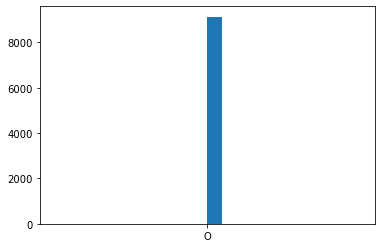

In [11]:
plt.hist(data['Total Claim Amount'].interpolate(method='polynomial', order=2), bins=20) 
plt.show()

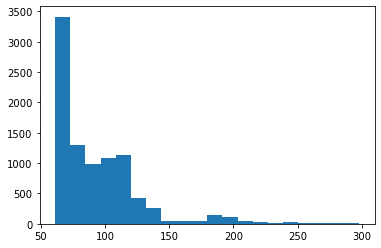

In [12]:
plt.hist(data['Monthly Premium Auto'].fillna(data['Monthly Premium Auto'].mean()), bins=20)
plt.show()

In [13]:
data['Monthly Premium Auto'] = data['Monthly Premium Auto'].interpolate(method='polynomial', order=2)

In [14]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [15]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


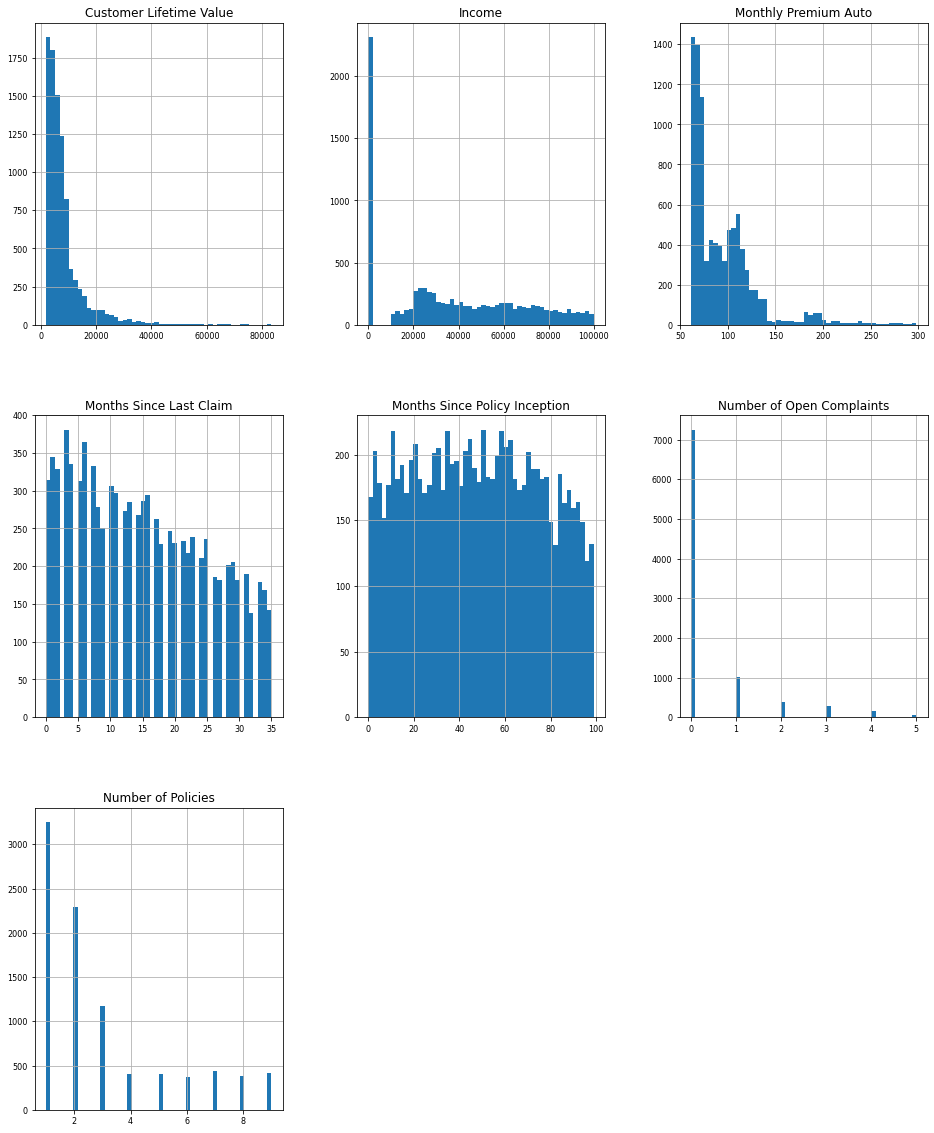

In [16]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

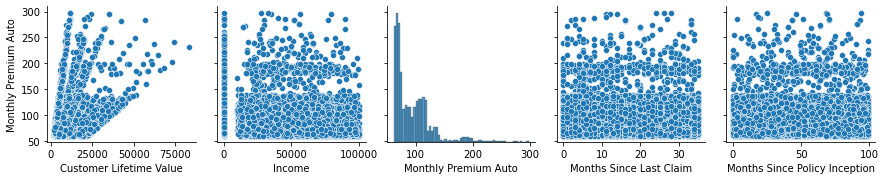

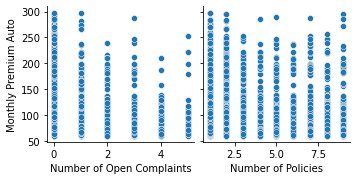

In [17]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['Monthly Premium Auto'])

In [18]:
# shuffling the df but maintaining a column with the original indexes
data1 = data.copy().sample(frac=1).reset_index().rename(columns={'index': 'ind'})
data1

,ind,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,8850,YT92071,California,5243.538258,No,Basic,Master,1/30/11,Employed,F,44851,Suburban,Divorced,66,28,51,0,3,Corporate Auto,Corporate L2,Offer3,Web,O,Four-Door Car,Medsize
1,3232,PN12718,California,8681.046339,No,Extended,Bachelor,2/3/11,Unemployed,M,0,Suburban,Married,86,6,57,2,2,Personal Auto,Personal L1,Offer2,Branch,O,Two-Door Car,Large
2,8171,CE92675,California,6990.691643,No,Basic,College,2/21/11,Unemployed,F,0,Suburban,Single,68,24,2,0,2,Personal Auto,Personal L1,Offer2,Web,O,Four-Door Car,Large
3,7707,DZ62350,California,2514.282096,No,Basic,High School or Below,2/7/11,Employed,M,24744,Suburban,Divorced,65,1,0,0,1,Personal Auto,Personal L3,Offer4,Call Center,O,Four-Door Car,Medsize
4,4400,JB11283,California,12743.351750,No,Basic,Bachelor,2/21/11,Employed,M,99583,Rural,Divorced,64,35,85,0,2,Personal Auto,Personal L2,Offer3,Branch,O,Four-Door Car,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2813,EP83939,Arizona,5575.751228,No,Basic,High School or Below,1/26/11,Employed,M,91416,Rural,Married,69,4,39,0,5,Personal Auto,Personal L3,Offer2,Call Center,O,Four-Door Car,Medsize
9130,947,WZ53904,Arizona,2659.980563,No,Basic,Bachelor,1/11/11,Employed,M,21297,Rural,Single,71,26,56,0,1,Personal Auto,Personal L3,Offer2,Agent,O,Four-Door Car,Medsize
9131,8316,GG84614,Oregon,3031.587812,No,Extended,High School or Below,1/8/11,Employed,F,27435,Suburban,Single,76,9,6,0,1,Personal Auto,Personal L3,Offer3,Branch,O,Two-Door Car,Medsize
9132,2285,SO47345,Arizona,9403.875138,No,Basic,Master,1/26/11,Employed,F,56410,Urban,Married,117,13,73,0,3,Personal Auto,Personal L2,Offer1,Agent,O,SUV,Medsize


In [19]:
# applying interpolation to shuffled df
data1['Monthly Premium Auto'] = data1['Monthly Premium Auto'].interpolate(method='polynomial', order=2)

<AxesSubplot:>

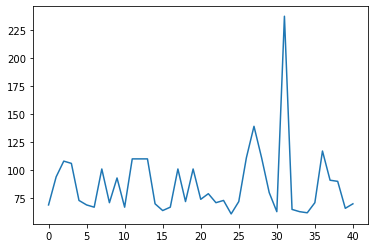

In [20]:
data['Monthly Premium Auto'].loc[0:40].plot()

<AxesSubplot:>

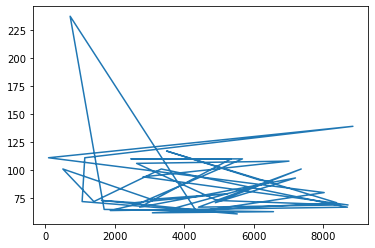

In [21]:
data1.sort_values('ind')['Monthly Premium Auto'][0:40].plot()

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('Monthly Premium Auto', axis=1)
y = data['Monthly Premium Auto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [23]:
from sklearn.preprocessing import StandardScaler
import pickle

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

transformer = StandardScaler()
transformer.fit(X_train_num)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)

# if you need to un-scale afterwards, speacially if you scaled target variable:
unscaled_X_train = loaded_transformer.inverse_transform(X_train_)

# it makes sense to scale the target variable as well
unscaled_X_train[0][0]

4768.955924

In [24]:
from sklearn.preprocessing import Normalizer

numericals = X.select_dtypes(np.number) # using only X, and not y

transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)

In [25]:
from sklearn.preprocessing import MinMaxScaler

numericals = data.select_dtypes(np.number)

transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [26]:
#Categorical data

for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

No     7826
Yes    1308
Name: Response, dtype: int64 

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157


In [27]:
categories = pd.DataFrame(data['Monthly Premium Auto'].value_counts())
categories.columns = ['counts']
categories

,counts
65,348
66,307
71,304
73,302
63,289
...,...
273,1
287,1
268,1
232,1


In [28]:
categories = pd.DataFrame(data['Gender'].value_counts())
categories.columns = ['counts']
categories

,counts
F,4658
M,4476


In [29]:
categories = pd.DataFrame(data['EmploymentStatus'].value_counts())
categories.columns = ['counts']
categories

,counts
Employed,5698
Unemployed,2317
Medical Leave,432
Disabled,405
Retired,282


In [30]:
categories = pd.DataFrame(data['Education'].value_counts())
categories.columns = ['counts']
categories

,counts
Bachelor,2748
College,2681
High School or Below,2622
Master,741
Doctor,342


In [31]:
categories = pd.DataFrame(data['State'].value_counts())
categories.columns = ['counts']
categories

,counts
California,3150
Oregon,2601
Arizona,1703
Nevada,882
Washington,798


In [32]:
group_states = categories[categories['counts'] < 2000].index
group_states

Index(['Arizona', 'Nevada', 'Washington'], dtype='object')

In [33]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

In [35]:
data['State'] = data['State'].apply(clean_state)

In [36]:
data['State'].value_counts()

other         3383
California    3150
Oregon        2601
Name: State, dtype: int64

In [44]:
import re

In [45]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,other,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,O,Two-Door Car,Medsize
1,QZ44356,other,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,O,Four-Door Car,Medsize
2,AI49188,other,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,O,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,O,SUV,Medsize
4,HB64268,other,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,O,Four-Door Car,Medsize


In [46]:
data_crosstab = pd.crosstab(data['Gender'], data['Customer'], margins=True)
data_crosstab

Customer,AA10041,AA11235,AA16582,AA30683,AA34092,AA35519,AA56476,AA69265,AA71604,AA93585,AB13432,AB21519,AB23825,AB26022,AB31813,AB45325,AB60627,AB62982,AB69140,AB72731,AB73565,AB78984,AB96670,AB98823,AC13887,AC22873,AC24378,AC40767,AC42963,AC58002,AC67315,AC73173,AC75391,AC79024,AD12500,AD18174,AD28349,AD28535,AD33653,AD33971,AD38685,AD56037,AD63766,AD71478,AD89594,AD95939,AE23906,AE30506,AE60813,AE62631,AE74442,AE89300,AE90216,AE93522,AE98193,AF10970,AF17671,AF20716,AF36894,AF37776,AF41118,AF47139,AF48816,AF49027,AF49625,AF69537,AF81450,AG22225,AG32304,AG39150,AG45299,AG47947,AG56998,AG58599,AG62087,AG62140,AG85127,AG85615,AH17051,AH22694,AH39293,AH41065,AH41449,AH53588,AH55475,AH58807,AH65907,AH84063,AH89786,AH92481,AH97088,AH99727,AI11191,AI14767,AI16519,AI47152,AI49188,AI49712,AI58313,AI58500,AI61368,AI74959,AI85843,AJ32539,AJ58038,AJ69060,AJ69778,AJ89107,AJ89108,AK11669,AK11719,AK17025,AK44985,AK46006,AK54675,AK59340,AK61491,AK72422,AK90865,AL21967,AL27471,AL35726,AL43475,AL43715,AL46984,AL50693,AL78075,AL95338,AL96740,AM17304,AM26598,AM26717,AM28777,AM29546,AM30008,AM32820,AM34581,AM36670,AM52614,AM53473,AM57175,AM72411,AM79057,AM88377,AM89558,AM92343,AM94127,AM97901,AM99192,AN21193,AN32867,AN36757,AN47199,AN53225,AN57220,AN67558,AN79079,AN80983,AN97123,AO20938,AO40386,AO42003,AO46433,AO74776,AO77635,AO87348,AO98601,AP23850,AP27994,AP32891,AP34711,AP46166,AP47670,AP52126,AP52565,AP56340,AP59947,AP63665,AP65984,AP66226,AP67935,AP89323,AP90638,AP95078,AP98768,AQ11656,AQ25590,AQ30231,AQ34238,AQ46199,AQ51159,AQ51368,AQ52711,AQ70385,AQ70619,AQ91207,AQ94108,AR17553,AR25213,AR40217,AR47849,AR59416,AR61426,AR63478,AR69517,AR75105,AR83514,AR96516,AR99766,AS17174,AS18084,AS26192,AS48176,AS55478,AS55677,AS60178,AS62048,AS77287,AS78838,AS93181,AS97690,AS99827,AT13963,AT18041,AT24793,AT26484,AT29024,AT30076,AT31367,AT33529,AT36002,AT41276,AT49447,AT52647,AT55072,AT62618,AT72574,AT79008,AT84725,AT86990,AT89553,AT93647,AT98182,AU11344,AU13233,AU23837,AU45793,AU46443,AU46604,AU62013,AU71562,AU75025,AU77281,AU91447,AU94279,AU96286,AU98438,AV17528,AV25133,AV49798,AV72430,AV76907,AV93209,AV96010,AW17574,AW18068,AW27717,AW36627,AW48347,AW71157,AW73065,AW77988,AW84946,AW86033,AX10148,AX28231,AX36597,AX38728,AX39008,AX45422,AX56708,AX70794,AX71238,AX71707,AX86150,AX86552,AX99820,AY18433,AY19539,AY26056,AY29281,AY30324,AY35050,AY35539,AY40674,AY43037,AY52869,AY55759,AY59197,AY73718,AY84441,AY88788,AY98473,AY99324,AZ15952,AZ29426,AZ31562,AZ34845,AZ36763,AZ38648,AZ43057,AZ50087,AZ62651,AZ64856,AZ68072,AZ68184,AZ74055,AZ75509,AZ77669,AZ82578,AZ84403,AZ87715,AZ90068,AZ95587,BA17836,BA19651,BA26944,BA38428,BA40043,BA49679,BA51898,BA52133,BA56812,BA66627,BA75404,BA87048,BA87216,BA92673,BA97018,BB10681,BB11622,BB19609,BB21794,BB41401,BB48165,BB65725,BB82067,BC31913,BC34309,BC35753,BC43958,BC47264,BC48076,BC51708,BC52397,BC53363,BC53546,BC62782,BC64697,BC66536,BC66921,BC75105,BC77846,BC85847,BC86800,BC87161,BC87551,BC90645,BC97773,BD12981,BD13927,BD16530,BD35524,BD35676,BD36887,BD42101,BD53342,BD58297,BD66455,BD69478,BD70337,BD77090,BD84823,BD89564,BE10809,BE17305,BE25221,BE31382,BE33446,BE54454,BE55425,BE61743,BE62503,BE65350,BE69929,BE75190,BE78308,BE92692,BF45697,BF54215,BF55854,BF56053,BF69918,BF72793,BG15419,BG19572,BG30513,BG42047,BG44829,BG48083,BG51419,BG55927,BG60187,BG73480,BG74433,BG76355,BG80246,BG84194,BG85305,BG95711,BG96711,BH11344,BH23017,BH28530,BH35016,BH35482,BH36570,BH36973,BH43020,BH43379,BH52611,BH60627,BH61054,BH61137,BH68769,BH86846,BI17208,BI27443,BI33231,BI34286,BI34376,BI38192,BI46495,BI76326,BI81476,BJ13380,BJ18904,BJ22117,BJ26599,BJ53923,BJ58596,BJ65040,BJ82316,BK15048,BK21146,BK43823,BK47926,BK57087,BK59444,BK61065,BK73302,BK76107,BK76340,BK83393,BK85520,BL12371,BL13393,BL29046,BL29240,BL42392,BL44708,BL44722,BL54814,BL55947,BL66157,BL79888,BL89983,BL90769,BL93527,BL93659,BM15160,BM16805,BM21532,BM27144,BM28359,BM30720,BM31989,BM39234,BM45823,BM46418,BM53580,BM55732,BM66931,BM69081,BM69818,BM70908,BM71358,BM83544,BM92346

In [47]:
data_crosstab = pd.crosstab(data['Gender'], data['EmploymentStatus'], margins=True)
data_crosstab

EmploymentStatus,Disabled,Employed,Medical Leave,Retired,Unemployed,All
Gender,,,,,,
F,244,2937,214,128,1135,4658
M,161,2761,218,154,1182,4476
All,405,5698,432,282,2317,9134


In [48]:
data_crosstab = pd.crosstab(data['Customer'], data['State'], margins=True)
data_crosstab

State,California,Oregon,other,All
Customer,,,,
AA10041,1,0,0,1
AA11235,0,0,1,1
AA16582,0,0,1,1
AA30683,1,0,0,1
AA34092,1,0,0,1
...,...,...,...,...
ZZ83340,0,1,0,1
ZZ89380,0,1,0,1
ZZ91716,1,0,0,1


In [65]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer            9134 non-null   object
 1   State               9134 non-null   object
 2   Response            9134 non-null   object
 3   Coverage            9134 non-null   object
 4   Education           9134 non-null   object
 5   Effective To Date   9134 non-null   object
 6   EmploymentStatus    9134 non-null   object
 7   Gender              9134 non-null   object
 8   Location Code       9134 non-null   object
 9   Marital Status      9134 non-null   object
 10  Policy Type         9134 non-null   object
 11  Policy              9134 non-null   object
 12  Renew Offer Type    9134 non-null   object
 13  Sales Channel       9134 non-null   object
 14  Total Claim Amount  9134 non-null   object
 15  Vehicle Class       9134 non-null   object
 16  Vehicle Size        9134

Text(0.5, 0.98, 'Categorical Plotting')

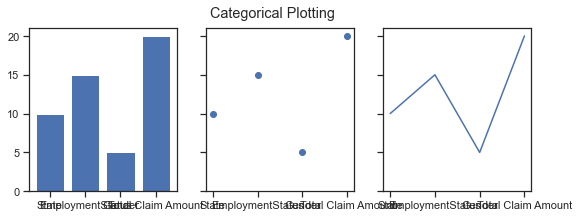

In [78]:
import matplotlib.pyplot as plt

data = {'State': 10, 'EmploymentStatus': 15, 'Gender': 5, 'Total Claim Amount': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')